In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../../data/cleaned_texts_oct19_2016.tsv', sep='\t')
records = records[records.pub_year > 1499]
records = records[records.pub_year < 1600]

In [3]:
records.head(1)

,Unnamed: 0,Unnamed: 0.1,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country,text_slug,full_text_slug
522,522,670,14321112,libro de proprietatibus rerum en romancehystor...,NaN,bartholomaeus,"gaspar de avila, a costa de joan thomas fabio",toledo,1529,NaN,NaN,"toledo,spain",toledo,spain,libro de proprietatibus rerum en romancehystor...,libro de proprietatibus rerum en romancehystor...


In [4]:
len(records)

9763

In [5]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)

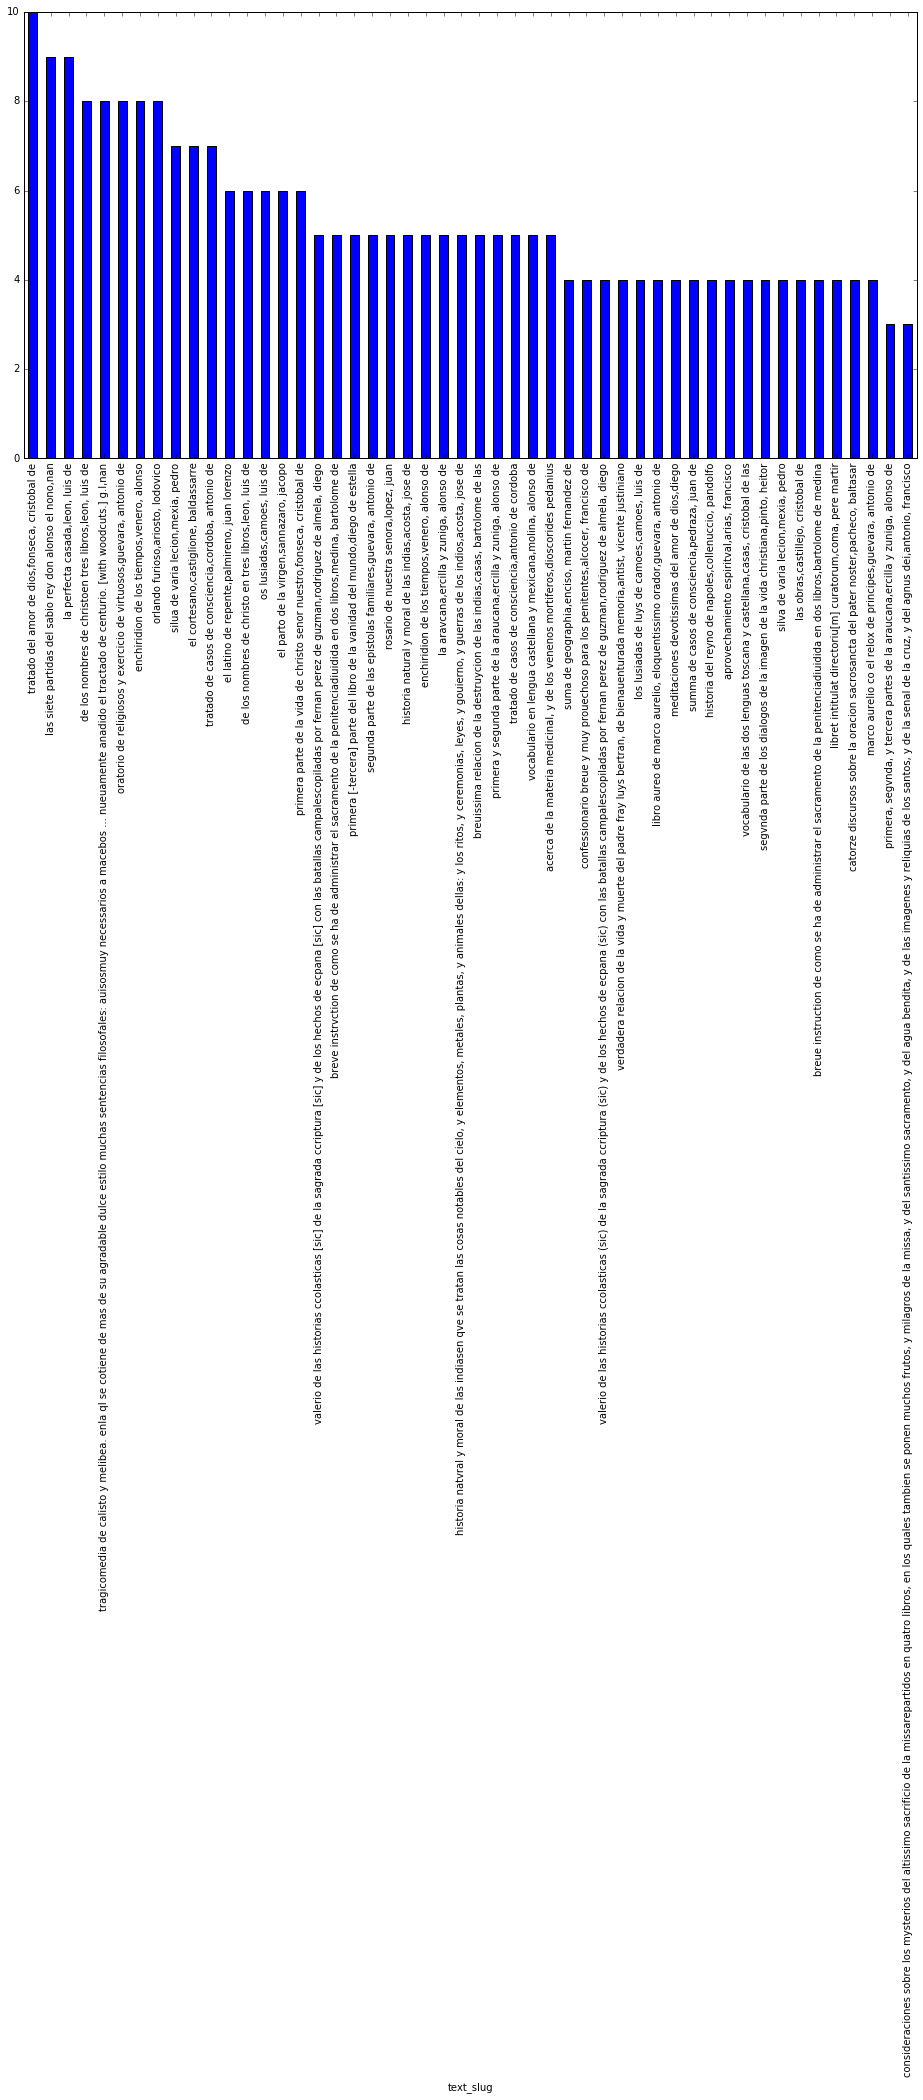

In [6]:
records.groupby('text_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:50].plot(kind="bar")

In [7]:
len(records.groupby('text_slug').count()['control_number'])

9013

In [8]:
d = {k: len(v) for k, v in records.groupby("text_slug").groups.items()}

def prob_dist(d):
    probs = {}
    for k, v in d.items():
        probs.setdefault(v, 0)
        probs[v] += 1
    return probs


probs = prob_dist(d)

In [9]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

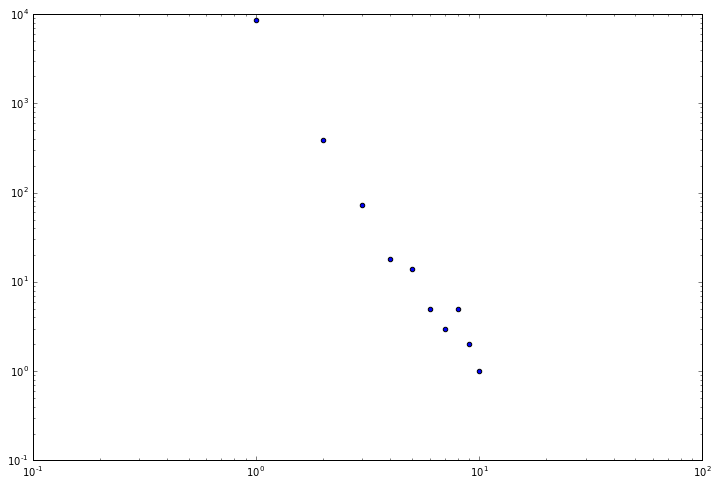

In [10]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(list(probs.keys()), list(probs.values()))

In [11]:
top_slugs = records.groupby('text_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].index

In [12]:
top_slugs

Index(['tratado del amor de dios,fonseca, cristobal de',
       'las siete partidas del sabio rey don alonso el nono,nan',
       'la perfecta casada,leon, luis de',
       'de los nombres de christoen tres libros,leon, luis de',
       'tragicomedia de calisto y melibea. enla ql se cotiene de mas de su agradable dulce estilo muchas sentencias filosofales: auisosmuy necessarios a macebos ... nueuamente anadido el tractado de centurio. [with woodcuts.] g.l,nan',
       'oratorio de religiosos y exercicio de virtuosos,guevara, antonio de',
       'enchiridion de los tiempos,venero, alonso',
       'orlando furioso,ariosto, lodovico',
       'silua de varia lecion,mexia, pedro',
       'el cortesano,castiglione, baldassarre'],
      dtype='object', name='text_slug')

In [13]:
top_producers = records[records.text_slug.isin(top_slugs)]

In [14]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['text_slug', 'pub_year']).count()['control_number']

In [15]:
top_producer_df1 = pd.DataFrame({
    'tratado del amor de dios,fonseca, cristobal de': group_top_producers.ix['tratado del amor de dios,fonseca, cristobal de'],
    'la perfecta casada,leon, luis de': group_top_producers.ix['la perfecta casada,leon, luis de'],
    'breuissima relacion de la destruycion de las indias,casas, bartolome de las': group_top_producers.ix['breuissima relacion de la destruycion de las indias,casas, bartolome de las'],
    'de los nombres de christoen tres libros,leon, luis de': group_top_producers.ix['de los nombres de christoen tres libros,leon, luis de'],
    'vocabulario en lengua castellana y mexicana,molina, alonso de': group_top_producers.ix['vocabulario en lengua castellana y mexicana,molina, alonso de'],
    'orlando furioso,ariosto, lodovico': group_top_producers.ix['orlando furioso,ariosto, lodovico'],
    'arte de la lengua mexicana y castellana,molina, alonso de': group_top_producers.ix['arte de la lengua mexicana y castellana,molina, alonso de'],
    'las siete partidas del sabio rey don alonso el nono,nan': group_top_producers.ix['las siete partidas del sabio rey don alonso el nono,nan'],
    'tragicomedia de calisto y melibea': group_top_producers.ix['tragicomedia de calisto y melibea. enla ql se cotiene de mas de su agradable dulce estilo muchas sentencias filosofales: auisosmuy necessarios a macebos ... nueuamente anadido el tractado de centurio. [with woodcuts.] g.l,nan'],
    'oratorio de religiosos y exercicio de virtuosos,guevara, antonio de': group_top_producers.ix['oratorio de religiosos y exercicio de virtuosos,guevara, antonio de'],
    }).fillna(0)

KeyError: 'breuissima relacion de la destruycion de las indias,casas, bartolome de las'

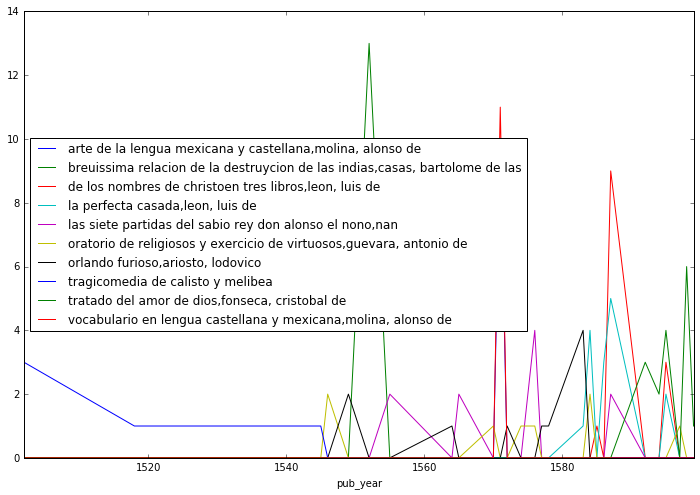

In [20]:
top_producer_df1.plot()

In [ ]:
top_producer_df5 = pd.DataFrame({
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
}).fillna(0)